# Doji Candle

In [1]:
import pandas as pd
import numpy as np
import talib
import mplfinance as mpf
import datetime
import matplotlib as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("TATASTEEL.csv")
df['Date'] = df['Date'].astype(str).str[4:21]
df['Date'] = pd.to_datetime(df.Date)
df = df[df.Date > '2023-01-10 9:10:00']
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2023-01-10 09:15:00,117.65,118.75,117.65,118.70
2023-01-10 09:20:00,118.65,119.65,118.50,119.60
2023-01-10 09:25:00,119.60,119.75,119.00,119.05
2023-01-10 09:30:00,119.00,119.40,119.00,119.10
2023-01-10 09:35:00,119.00,119.25,118.70,118.80


In [3]:
doji = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])
df['Doji']= doji
df['Signal'] = 0

def createsignal(doji):
    import numpy as np
    signal   = []
    for date,value in doji.iteritems():
        if value > 0:
            signal.append(1)
        else:
            signal.append(np.nan)
    return signal

In [8]:
df['Signal'] = DojiSignal

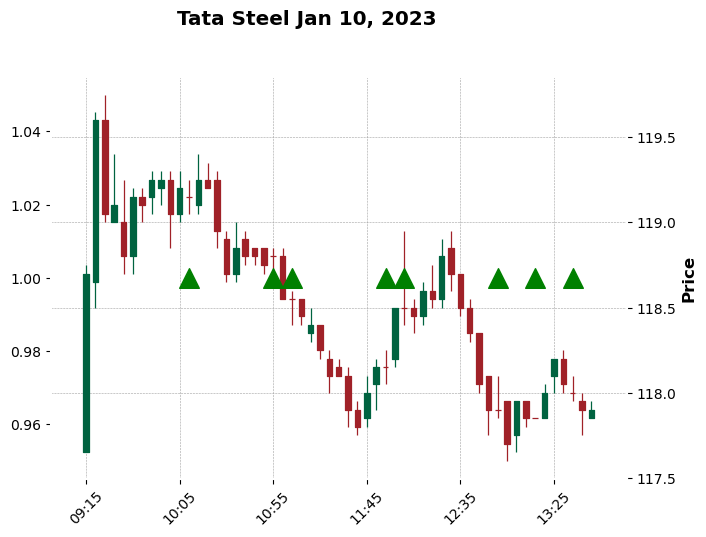

In [5]:
DojiSignal = createsignal(doji)
apd = mpf.make_addplot(DojiSignal,type='scatter',markersize=200,marker='^', color='green')
mpf.plot(df,addplot=apd, type='candle', style='charles',title='Tata Steel Jan 10, 2023',)

In [10]:
df[df.Signal == 1]

,Open,High,Low,Close,Doji,Signal
Date,,,,,,
2023-01-10 10:10:00,119.15,119.25,119.05,119.15,100,1.0
2023-01-10 10:55:00,118.80,118.85,118.70,118.80,100,1.0
2023-01-10 11:05:00,118.55,118.60,118.40,118.55,100,1.0
2023-01-10 11:55:00,118.15,118.25,118.05,118.15,100,1.0
2023-01-10 12:05:00,118.50,118.95,118.40,118.50,100,1.0
2023-01-10 12:55:00,117.90,118.10,117.85,117.90,100,1.0
2023-01-10 13:15:00,117.85,117.85,117.85,117.85,100,1.0
2023-01-10 13:35:00,118.00,118.10,117.95,118.00,100,1.0
